In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# Definições iniciais
GRID_SIZE = 8
LIVRE = 0
MONTANHA = -1
AREIA_MOVEDICA = -2
INICIO = 1
OBJETIVO = 2

In [8]:
# Pontos especiais no Grid
inicio = (0, 0)
objetivo = (7, 7)
montanhas = [(1, 1), (2, 2), (3, 3)]
areias_movedicas = [(4, 4), (5, 5), (6, 6)]

In [9]:
# Ações possíveis
acoes = {'CIMA': (-1, 0), 'BAIXO': (1, 0), 'ESQUERDA': (0, -1), 'DIREITA': (0, 1)}

In [10]:
# Cria um grid 8x8 e posiciona os elementos especiais
def criar_grid():
    grid = np.zeros((GRID_SIZE, GRID_SIZE), dtype=int)
    grid[inicio] = INICIO
    grid[objetivo] = OBJETIVO
    for montanha in montanhas:
        grid[montanha] = MONTANHA
    for areia_movedica in areias_movedicas:
        grid[areia_movedica] = AREIA_MOVEDICA
    return grid

In [11]:
# Exibe o grid no console
def visualizar_grid(grid):
    print("Grid World:")
    print(grid)
    plt.imshow(grid, cmap='viridis', interpolation='nearest')
    plt.colorbar(ticks=[LIVRE, MONTANHA, AREIA_MOVEDICA, INICIO, OBJETIVO],
                 label='Tipos de Células')
    plt.title("Grid World")
    plt.show()

In [12]:
# Determina as ações possíveis de uma dada posição no grid
def acoes_possiveis(posicao, grid):
    possiveis_acoes = []
    for acao, (dx, dy) in acoes.items():
        nova_posicao = (posicao[0] + dx, posicao[1] + dy)
        if 0 <= nova_posicao[0] < GRID_SIZE and 0 <= nova_posicao[1] < GRID_SIZE and grid[nova_posicao] != MONTANHA:
            possiveis_acoes.append(acao)
    return possiveis_acoes

In [13]:
# Calcula a recompensa de se mover para uma determinada posição no grid
def recompensa(posicao, grid):
    if grid[posicao] == AREIA_MOVEDICA:
        return -1000  # Penalidade severa para areia movediça
    elif grid[posicao] == OBJETIVO:
        return 1000   # Grande recompensa para alcançar o objetivo
    else:
        return -1     # Pequena penalidade para cada passo

In [14]:
# Implementa a lógica do agente usando programação dinâmica
def logica_agente(grid, inicio, objetivo):
    valores = np.full(grid.shape, -np.inf)  # Inicializa a matriz de valores
    valores[objetivo] = recompensa(objetivo, grid)

    # Atualiza os valores com base nas recompensas esperadas
    for _ in range(GRID_SIZE**2):
        for x in range(GRID_SIZE):
            for y in range(GRID_SIZE):
                posicao = (x, y)
                if grid[posicao] in [LIVRE, INICIO, OBJETIVO]:
                    max_valor = -np.inf
                    for acao in acoes_possiveis(posicao, grid):
                        dx, dy = acoes[acao]
                        nova_posicao = (x + dx, y + dy)
                        valor = recompensa(nova_posicao, grid) + valores[nova_posicao]
                        if valor > max_valor:
                            max_valor = valor
                    valores[posicao] = max_valor

    # Encontra o caminho usando os valores calculados
    caminho = []
    posicao_atual = inicio
    while posicao_atual != objetivo:
        caminho.append(posicao_atual)
        max_valor = -np.inf
        melhor_acao = None
        for acao in acoes_possiveis(posicao_atual, grid):
            dx, dy = acoes[acao]
            nova_posicao = (posicao_atual[0] + dx, posicao_atual[1] + dy)
            if valores[nova_posicao] > max_valor:
                max_valor = valores[nova_posicao]
                melhor_acao = nova_posicao
        posicao_atual = melhor_acao

    caminho.append(objetivo)  # Adiciona o objetivo ao caminho
    return caminho

Grid World:
[[ 1  0  0  0  0  0  0  0]
 [ 0 -1  0  0  0  0  0  0]
 [ 0  0 -1  0  0  0  0  0]
 [ 0  0  0 -1  0  0  0  0]
 [ 0  0  0  0 -2  0  0  0]
 [ 0  0  0  0  0 -2  0  0]
 [ 0  0  0  0  0  0 -2  0]
 [ 0  0  0  0  0  0  0  2]]


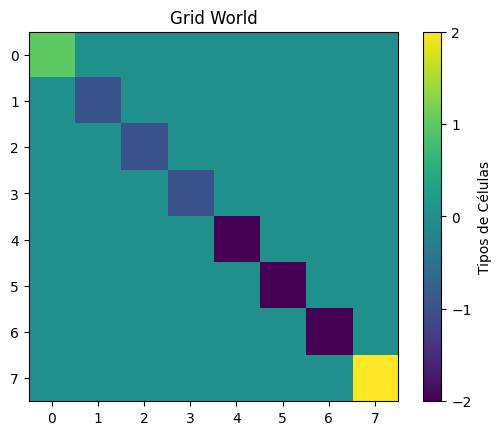

In [16]:
# Executando código
grid = criar_grid()
visualizar_grid(grid)

In [17]:
# Testando o código
caminho = logica_agente(grid, inicio, objetivo)
print("Caminho encontrado:", caminho)

Caminho encontrado: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7)]
